# Esercitazione 5: algoritmi per la visualizzazione di campioni multivariati e riduzione dimensionale

**Task:** Scopo: familiarizzare con l'implementazione di algoritmi di riduzione dimensionale (PCA, tSNE, UMAP) usando i package scikit-learn e umap-learn

**Dataset:**

MNIST: benchmark dataset costituito da immagini di caratteri numerici scritti a mano ([wikipedia](https://en.wikipedia.org/wiki/MNIST_database), [Y. LeCun Original web page](http://yann.lecun.com/exdb/mnist/))

Ising2D: vedere precedente esercitazione [link](https://github.com/stefanogiagu/corso_AI_2023/tree/main/notebooks/es4)

In [1]:
# scarica dataset Ising2D
!rm -rf ising_conf.dat.gz
!rm -rf ising_conf.dat
!rm -rf ising_label.dat.gz
!rm -rf ising_label.dat
!wget http://giagu.web.cern.ch/giagu/CERN/ising_conf.dat.gz
!wget http://giagu.web.cern.ch/giagu/CERN/ising_label.dat.gz
!gunzip ising_conf.dat.gz
!gunzip ising_label.dat.gz

--2025-03-03 15:36:05--  http://giagu.web.cern.ch/giagu/CERN/ising_conf.dat.gz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 137.138.124.182, 188.185.18.46, 188.185.5.88, ...
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|137.138.124.182|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://giagu.web.cern.ch/giagu/CERN/ising_conf.dat.gz [following]
--2025-03-03 15:36:05--  https://giagu.web.cern.ch/giagu/CERN/ising_conf.dat.gz
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|137.138.124.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2953855 (2.8M) [application/x-gzip]
Saving to: ‘ising_conf.dat.gz’

ising_conf.dat.gz   100%[===================>]   2.82M  3.27MB/s    in 0.9s    

2025-03-03 15:36:07 (3.27 MB/s) - ‘ising_conf.dat.gz’ saved [2953855/2953855]

--2025-03-03 15:36:07--  http://giagu.web.cern.ch/giagu/CERN/ising_label.dat.gz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 137.138.124.182, 188.185.1

In [2]:
# legge dataset Ising2D
import numpy as np

# leggiamo le configurazioni ising dal file usando numpy (25k esempi oguno da 28x28 spin)
X_ising = np.loadtxt('ising_conf.dat')
X_ising = X_ising.reshape(25000,28*28)
print('X_ising shape: ',X_ising.shape)

# leggiamo da file le label associate:
T_ising = np.loadtxt('ising_label.dat')
print('T_ising shape: ',T_ising.shape)

ord_sele = (T_ising < 2.0)
cri_sele = ((T_ising >= 2.0) & (T_ising <= 2.5))
dis_sele = (T_ising > 2.5)

Y_ising = np.zeros(shape=T_ising.shape)
Y_ising[ord_sele]=0
Y_ising[cri_sele]=1
Y_ising[dis_sele]=2

print('Y_ising shape: ',Y_ising.shape)

X_ising shape:  (25000, 784)
T_ising shape:  (25000,)
Y_ising shape:  (25000,)


In [3]:
# scarica e legge dataset MNIST from openml (https://openml.org/)
from sklearn.datasets import fetch_openml

X_mnist, Y_mnist = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")

print(X_mnist.shape)
print(Y_mnist.shape)
Y_mnist = Y_mnist.astype(int)

(70000, 784)
(70000,)


**Parte 1**

Analisi PCA: campione Ising2D

1.   implementare un'analisi a componenti prncipali (PCA) usando la libreria sklearn:

`from sklearn.decomposition import PCA`

2.   printare il valore della varianza spiegata per le prime 10 componenti PCA

3.   graficare lo scatter plot delle prime due componenti principali in due plot distinti: uno in cui ogni configurazione viene colorata in accordo al valore della temeperatura, e un secondo in cui ogni configurazione viene colorata in accordo ad una delle tre clasi *(0,1,2)* corrispondenti alle configurazioni ordinate, critiche e disordinate, rispettivamente.

4.   graficare lo scatter plot della prima componente principale in funzione della magnetizzazione media calcolata nell'esercitazione precedente. Cosa se ne deduce?

In [4]:
# PCA su Ising2D
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_result = pca.fit_transform(X_ising)
explained_variance = pca.explained_variance_ratio_
for i,var in enumerate(explained_variance):
  print(f'Componente {i+1} \t Varianza spiegata: {var}')
print(f'Varianza spiegata totale: {np.sum(explained_variance)}')

Componente 1 	 Varianza spiegata: 0.36692223272715696
Componente 2 	 Varianza spiegata: 0.020684599425635466
Componente 3 	 Varianza spiegata: 0.01979491232477254
Componente 4 	 Varianza spiegata: 0.01966579221626477
Componente 5 	 Varianza spiegata: 0.019201865249682436
Componente 6 	 Varianza spiegata: 0.005148917590449861
Componente 7 	 Varianza spiegata: 0.0050030654510986065
Componente 8 	 Varianza spiegata: 0.004945135138544343
Componente 9 	 Varianza spiegata: 0.004901480639641408
Componente 10 	 Varianza spiegata: 0.004783323236149785
Varianza spiegata totale: 0.4710513239993961


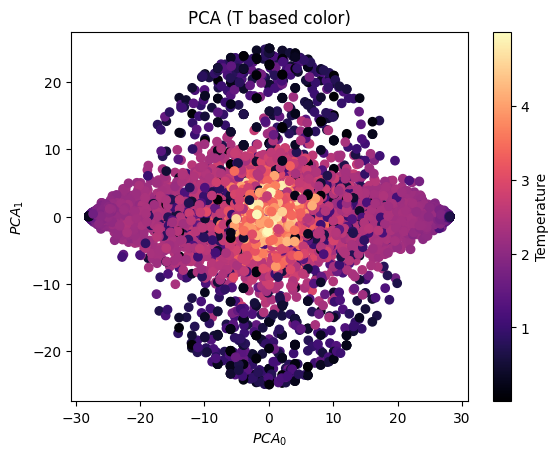

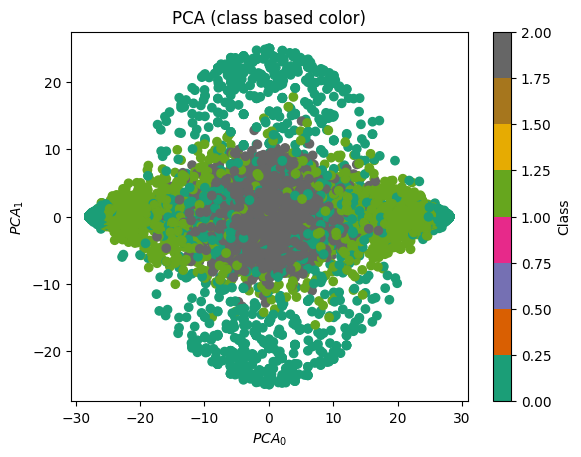

In [6]:
# Grafico le prime due componenti colorando a seconda della temperatura
import matplotlib.pyplot as plt
plt.scatter(pca_result[:,0], pca_result[:,1], c=T_ising, cmap='magma')
plt.xlabel(r'$PCA_0$')
plt.ylabel(r'$PCA_1$')
plt.title('PCA (T based color)')
plt.colorbar(label='Temperature')
plt.show()

# Grafico le prime due componenti colorando a seconda della classe
plt.scatter(pca_result[:,0], pca_result[:,1], c=Y_ising, cmap='Dark2')
plt.xlabel(r'$PCA_0$')
plt.ylabel(r'$PCA_1$')
plt.title('PCA (class based color)')
plt.colorbar(label='Class')
plt.show()

Text(0.5, 0, '$PCA_2$')

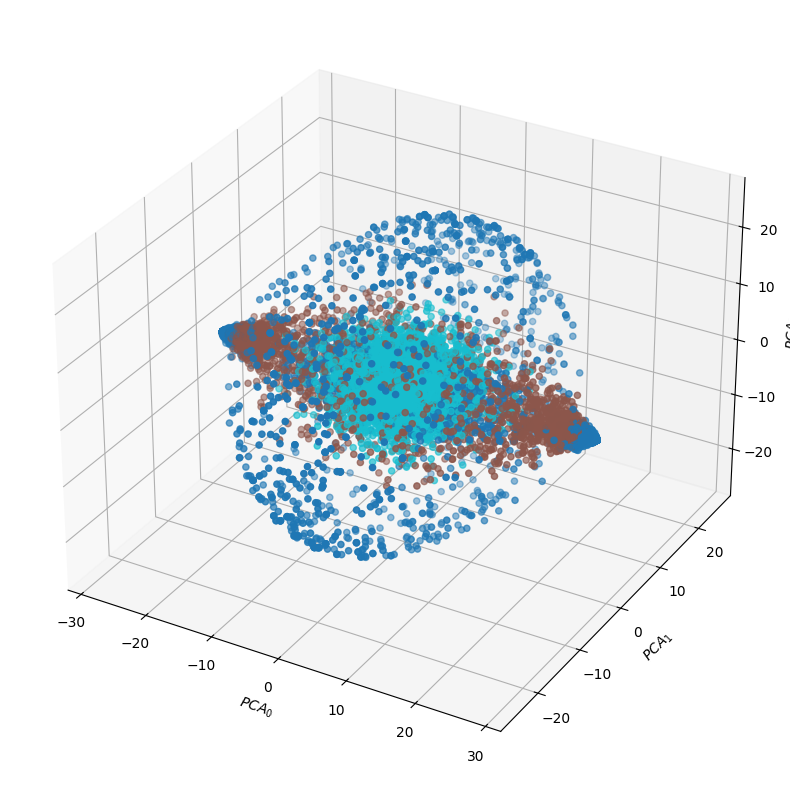

In [7]:
# Faccio plot 3D delle prime tre componenti della PCA
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    xs = pca_result[:,0],
    ys = pca_result[:,1],
    zs = pca_result[:,2],
    c = Y_ising,
    cmap='tab10'
)
ax.set_xlabel(r'$PCA_0$')
ax.set_ylabel(r'$PCA_1$')
ax.set_zlabel(r'$PCA_2$')

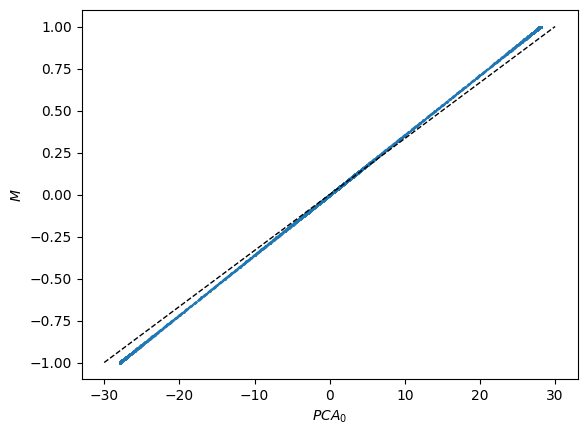

In [8]:
# calcolo magnetizzazione media
M_ising = np.sum(X_ising, axis=1)/X_ising.shape[1]

plt.scatter(pca_result[:,0], M_ising, s=0.1)
plt.plot([-30,30],[-1,1], color='black', linewidth=1, linestyle='dashed')
plt.xlabel('$PCA_0$')
plt.ylabel('$M$');

# la prima componente principale corrisponde alla magnetizzazione media dei campioni
# (in effetti il modello di ising2D dipende da un unico parametro d'ordine che descrive
# la transizione di fase ordine-disordine, rappresentato proprio dalla magnetizzazione del sistema).

**Parte 2**

Analisi PCA: campione MNIST

0.   normalizzare le immagini in [0,1] e graficare le prime 16 immagini mnist

1.   implementare un'analisi a componenti prncipali (PCA) usando la libreria sklearn sul campione MNIST

2.   printare il valore della varianza spiegata per le prime 10 componenti PCA

3.   graficare lo scatter plot delle prime due componenti principali in cui ogni configurazione viene colorata in accordo al valore della label di classe Y_mnist (0,1,2,3,...,9)

4.   applicare la trasformzione inversa PCA per tornare nello spazio originale alle prime 10 componenti principali, e graficare le prime 16 immagini mnist confrontandole con le immagini originali ... cosa è cambiato? Perché?
Riprovare usando 2 componenti principali, cosa cambia? Quante componenti sono necessarie per avere una ricostruzione in cui i caratteri siano percepibili?

<Figure size 640x480 with 0 Axes>

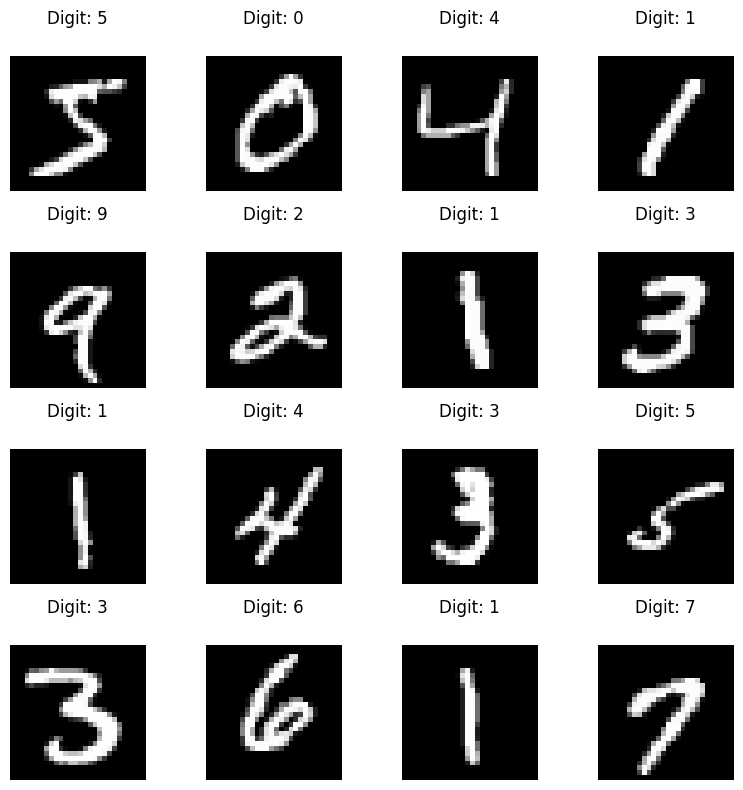

In [9]:
import matplotlib.pyplot as plt

# Normalizzazione X_mnist e visualizzazione
X_mnist = X_mnist/256.  # il valore max di ogni immagine è 256
plt.gray()  # imposta la mappa dei colori in scala di grigi per le immagini che verranno visualizzate successivamente
fig = plt.figure(figsize=(8,8))
for i in range(0,16):
  ax = fig.add_subplot(4,4,i+1, title='Digit: {}'.format(str(Y_mnist[i])))  #  utilizza il metodo matshow() per visualizzare l'immagine corrispondente all'elemento i dell'insieme di dati MNIST. L'immagine viene riorganizzata in una matrice 28x28 utilizzando il metodo reshape()
  # astype(float) converte i valori dell'immagine in numeri in virgola mobile per garantire che vengano visualizzati correttamente
  ax.matshow(X_mnist[i].reshape(28,28).astype(float))
  plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# PCA a 10 componenti
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca_result = pca.fit_transform(X_mnist)
# Questo metodo viene utilizzato per addestrare il modello PCA sui dati e
# trasformarli simultaneamente. Prende in input una matrice X di dati, dove ogni
# riga rappresenta un'osservazione e ogni colonna rappresenta una
# caratteristica. PCA addestrerà il modello utilizzando questi dati e quindi
# trasformerà la matrice X, riducendo le dimensioni dei dati proiettandoli sui
# loro componenti principali. Il risultato sarà una nuova matrice che
# rappresenta i dati trasformati.
print(f'Varianza spiegata per le componenti: {pca.explained_variance_ratio_}')
# Questo attributo restituisce la percentuale di varianza spiegata da ciascun
# componente principale. Dopo aver addestrato il modello PCA, è possibile
# accedere a questo attributo per ottenere un'idea di quanto ciascun componente
# principale spieghi la variazione nei dati originali. È un vettore di
# lunghezza uguale al numero di componenti principali e ogni elemento indica la
# frazione della varianza totale spiegata da quel componente principale.
# Quindi è una percentuale.

# Varianza spiegata per le componenti: indica quanto della variazione totale nei dati può essere attribuita a quel componente principale specifico

# Provo a stamparli così
print()
explained_variance = pca.explained_variance_ratio_
for i,var in enumerate(explained_variance):
  print(f'Componente {i+1} \t\t varianza spiegata: {var}')
print(f'Varianza spiegata totale: {np.sum(explained_variance)}')


Varianza spiegata per le componenti: [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227
 0.03278262 0.02889642 0.02758364 0.0234214 ]

Componente 1 		 varianza spiegata: 0.09746115922494747
Componente 2 		 varianza spiegata: 0.07155444586878704
Componente 3 		 varianza spiegata: 0.061495309807230294
Componente 4 		 varianza spiegata: 0.05403384528548192
Componente 5 		 varianza spiegata: 0.04888933703877889
Componente 6 		 varianza spiegata: 0.04305227030030039
Componente 7 		 varianza spiegata: 0.03278261523069927
Componente 8 		 varianza spiegata: 0.02889641566190041
Componente 9 		 varianza spiegata: 0.027583641976226494
Componente 10 		 varianza spiegata: 0.02342140167661668
Varianza spiegata totale: 0.48917044207096877


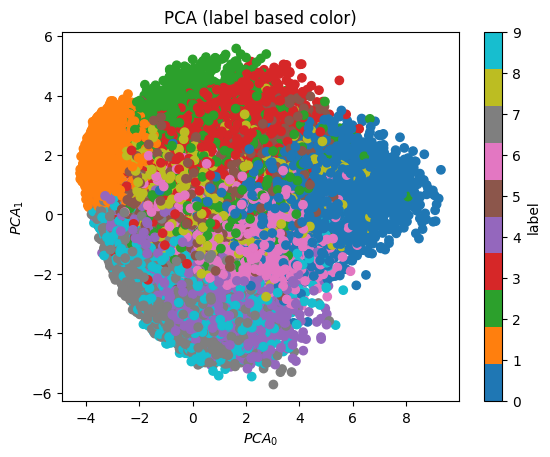

In [11]:
# Grafico le prime due componenti colorando a seconda della label
plt.scatter(pca_result[:,0], pca_result[:,1], c=Y_mnist, cmap='tab10')
plt.xlabel(r'$PCA_0$')
plt.ylabel(r'$PCA_1$')
plt.title('PCA (label based color)')
plt.colorbar(label='label')
plt.show()

<Figure size 640x480 with 0 Axes>

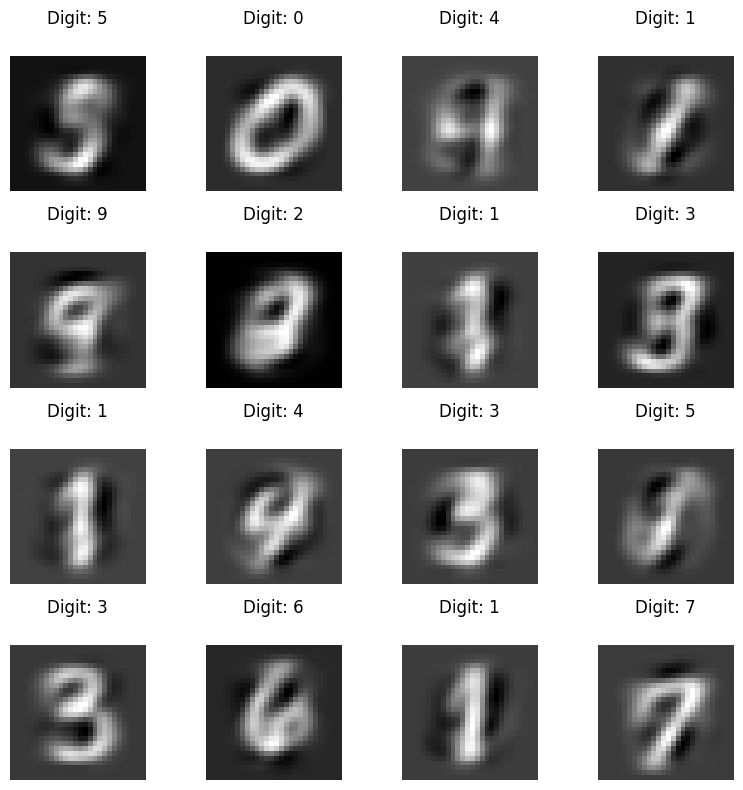

In [12]:
# PCA inversa
X_original = pca.inverse_transform(pca_result)
# ne faccio il plot
X_original = X_original/256.
plt.gray()  # Questo imposta la mappa dei colori in scala di grigi per le immagini che verranno visualizzate successivamente
fig = plt.figure(figsize=(8,8))
for i in range(0,16):
  ax = fig.add_subplot(4,4,i+1, title='Digit: {}'.format(str(Y_mnist[i])))  #  Questo utilizza il metodo matshow() per visualizzare l'immagine corrispondente all'elemento i dell'insieme di dati MNIST. L'immagine viene riorganizzata in una matrice 28x28 utilizzando il metodo reshape()
  # astype(float) converte i valori dell'immagine in numeri in virgola mobile per garantire che vengano visualizzati correttamente
  ax.matshow(X_original[i].reshape(28,28).astype(float))
  plt.axis('off')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

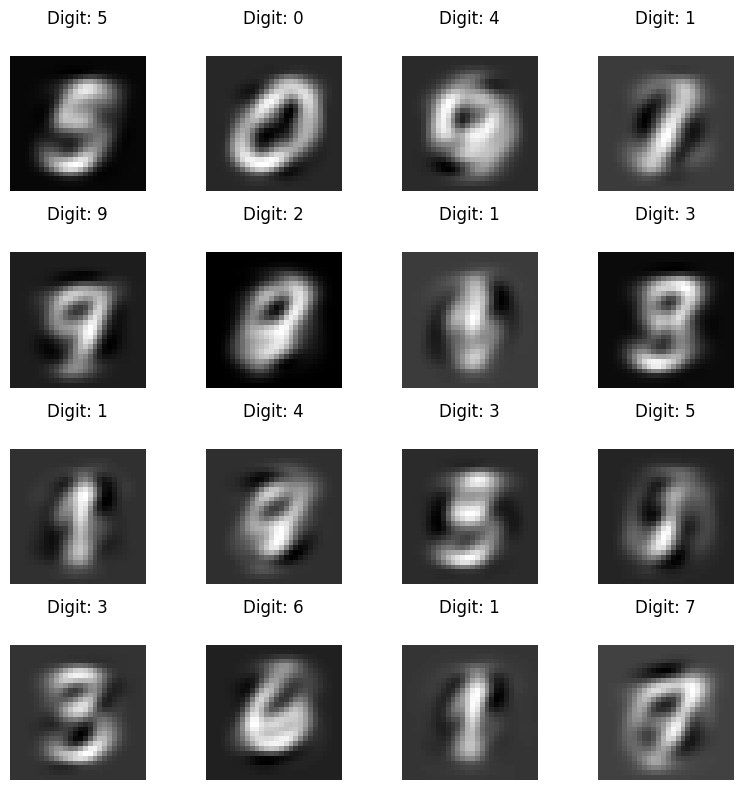

In [13]:
# provo a fare PCA inversa con le sei componenti principali
pca2 = PCA(n_components = 6)
pca2_result = pca2.fit_transform(X_mnist)
X_original2 = pca2.inverse_transform(pca2_result)
# ne faccio il plot
X_original2 = X_original2/256.
plt.gray()  # Questo imposta la mappa dei colori in scala di grigi per le immagini che verranno visualizzate successivamente
fig = plt.figure(figsize=(8,8))
for i in range(0,16):
  ax = fig.add_subplot(4,4,i+1, title='Digit: {}'.format(str(Y_mnist[i])))  #  Questo utilizza il metodo matshow() per visualizzare l'immagine corrispondente all'elemento i dell'insieme di dati MNIST. L'immagine viene riorganizzata in una matrice 28x28 utilizzando il metodo reshape()
  # astype(float) converte i valori dell'immagine in numeri in virgola mobile per garantire che vengano visualizzati correttamente
  ax.matshow(X_original2[i].reshape(28,28).astype(float))
  plt.axis('off')
plt.tight_layout()
plt.show()

**Parte 3**

Ripetere la parte 2 (punti 1,2,3) usando tSNE come algoritmo di rappresentazione di manifold multidimensionali (usare n_components del TSNE=2):

`from sklearn.manifold import TSNE`

NOTA: tSNE può essere molto lento se il numero di feature x numero di eventi è grande, in tal caso è possibile applicare prima una PCA che riduca le dimensioni a <=50 e poi applicare tSNE alle variabili PCA

Usare solo i primi 5000 eventi del campione MNIST e applicare tSNE, per diversi valori della perplexity: 5, 20 e 40 e confrontare i plot nello spazio tSNE0 vs tSNE1.

Usare tutti i dati ma dare in input a tSNE la pca a 50 componenti calcolata prima. Conforntare il plot con quelli precedenti.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.018s...
[t-SNE] Computed neighbors for 5000 samples in 2.277s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.480345
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.120361
[t-SNE] KL divergence after 300 iterations: 3.492983
t-SNE done! Time elapsed: 16.399097442626953 s
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.028s...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 5.011s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.063843
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.948883
[t-SNE] KL divergence after 300 iterations: 2.678452
t-SNE done! Time elapsed: 20.66366219520569 s
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.014s...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 1.747s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.327260
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.081200
[t-SNE] KL divergence after 300 iterations: 2.256235
t-SNE done! Time elapsed: 19.61366105079651 s
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.015s...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 3.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.684746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.144310
[t-SNE] KL divergence after 300 iterations: 1.887276
t-SNE done! Time elapsed: 22.93497061729431 s


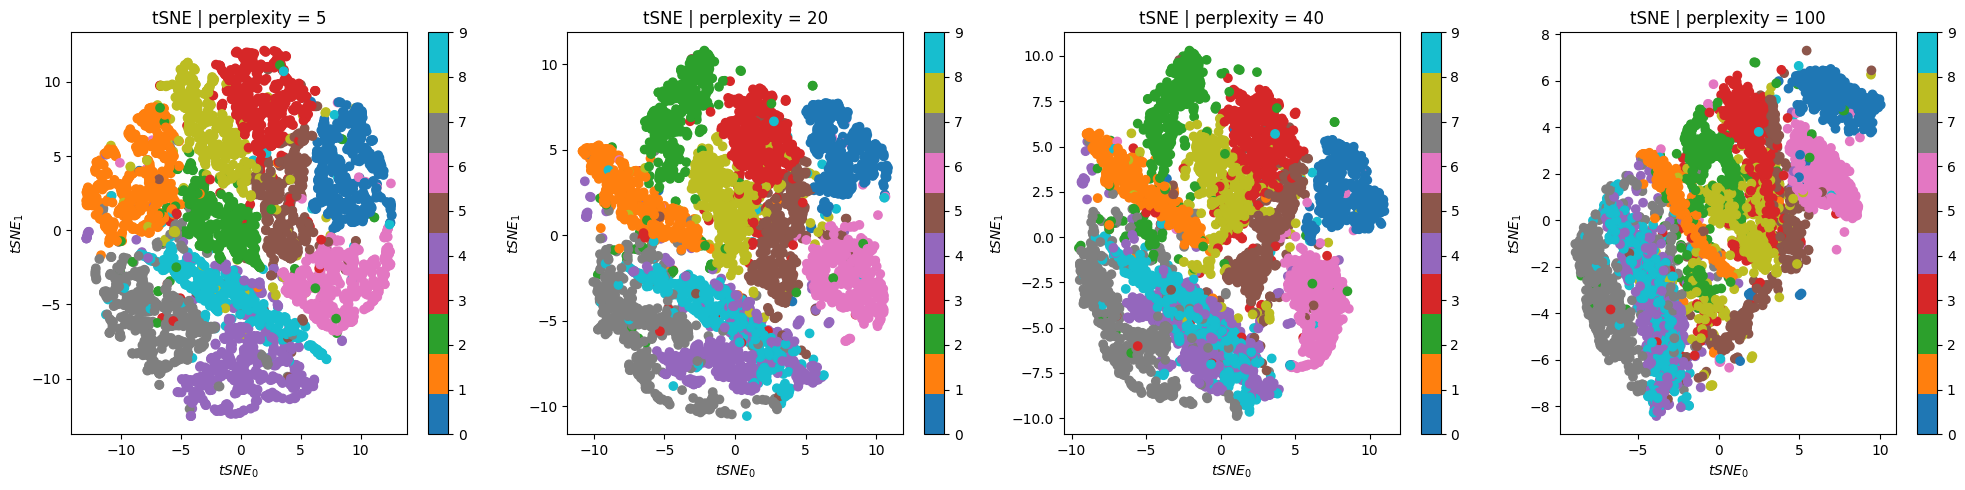

In [18]:
from sklearn.manifold import TSNE
import time

n = 5000  # eventi
perplexity = np.array([5,20,40, 100])

plt.figure(figsize=(20,5))
for i,p in enumerate(perplexity):
  time_start = time.time()
  tsne = TSNE(n_components=2, init='pca', random_state=1234, verbose=1, perplexity=p, n_iter=300)
  tsne_results = tsne.fit_transform(X_mnist[:n,:])
  print(f't-SNE done! Time elapsed: {time.time()-time_start} s')
  plt.subplot(1,4,i+1)
  plt.scatter(tsne_results[:,0], tsne_results[:,1], c=Y_mnist[:n], cmap='tab10')
  plt.xlabel(r'$tSNE_0$')
  plt.ylabel(r'$tSNE_1$')
  plt.title(f'tSNE | perplexity = {p}')
  plt.colorbar()
plt.tight_layout()


# spiegazione tsne = TSNE(n_components=2, init='pca', random_state=1234, verbose=1, perplexity=p, n_iter=300)
# n_components: numero di dimensioni che avranno i dati ridotti
# init='pca': indica che i dati verranno inizializzati utilizzando una PCA prima di eseguire l'algoritmo t-SNE.
# verbose=1 : il processo mostrerà informazioni dettagliate sull'avanzamento dell'algoritmo
# perplexity: rappresenta approssimativamente il numero di vicini più prossimi che devono essere considerati per ogni punto durante il calcolo delle affinità nei dati
# n_iter: specifica il numero di iterazioni che l'algoritmo eseguirà per ottimizzare la disposizione dei punti nello spazio di dimensioni ridotte.

In generale, aumentare la perplexity potrebbe portare a una visualizzazione più generale, dove le grandi strutture nei dati sono più evidenti, ma potrebbe sacrificare alcune informazioni più dettagliate, come le sottili differenze tra cluster di dati vicini.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.177s...
[t-SNE] Computed neighbors for 70000 samples in 50.966s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for s

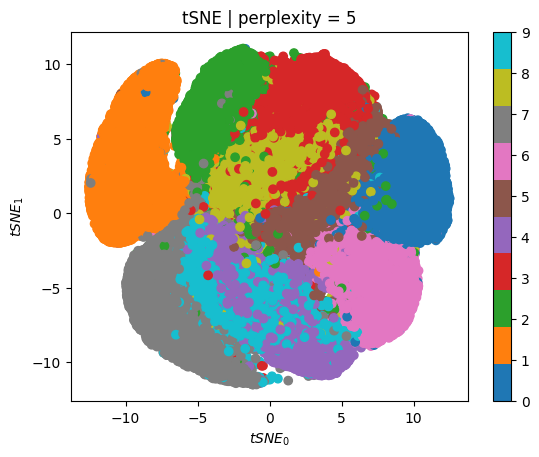

In [15]:
# uso tutti i dati invece di n, però uso anche la pca a 50 componenti

pca50 = PCA(n_components=50)
pca50_result = pca.fit_transform(X_mnist)

perplexity = np.array([5])

for i,p in enumerate(perplexity):
  time_start = time.time()
  tsne2 = TSNE(n_components=2, init='pca', random_state=1234, verbose=1, perplexity=p, n_iter=300)
  tsne2_results = tsne.fit_transform(pca50_result)
  print(f't-SNE done! Time elapsed: {time.time()-time_start} s')
  plt.scatter(tsne2_results[:,0], tsne2_results[:,1], c=Y_mnist, cmap='tab10')
  plt.xlabel(r'$tSNE_0$')
  plt.ylabel(r'$tSNE_1$')
  plt.title(f'tSNE | perplexity = {p}')
  plt.colorbar()


**Parte 4**

Ripetere la parte 2 (punti 1,2,3) usando UMAP come algoritmo di rappresentazione di manifold multidimensionali, applicarlo solo sui primi 5000 eventi MNIST e usare come input i dati mnist trasformati con PCA con 10 componenti.


```
!pip install umap-learn

import umap  # pip install umap-learn

manifold = umap.UMAP().fit(X, Y)
manifold_reduced = manifold.transform(X)

#e poi plottare manifold_reduced[:,0] vs [:,1] come fatto per PCA e tSNE

```

Quali sono le differenze?

In [19]:
!pip install umap-learn

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Text(0, 0.5, '$UMAP_1$')

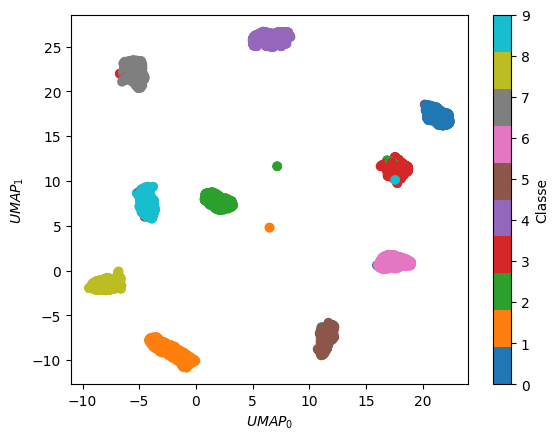

In [20]:
import umap

pca10 = PCA(n_components=10)
pca10_result = pca10.fit_transform(X_mnist[:n,:])
manifold = umap.UMAP().fit(pca10_result, Y_mnist[:n])
manifold_reduced = manifold.transform(pca10_result)

plt.scatter(manifold_reduced[:,0], manifold_reduced[:,1], c=Y_mnist[:n], cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('Classe')
plt.xlabel('$UMAP_0$')
plt.ylabel('$UMAP_1$')

**Commento sulle tecniche di riduzione dimensionale**

- **PCA**: Tecnica lineare che riduce la dimensionalità dei dati mantenendo invariata la varianza e identificando le direzioni (componenti principali) che spiegano la maggior parte della variabilità dei dati. Non è una tecnica adatta a dati con strutture non lineari e complesse.
- **tSNE**: Tecnica non lineare che mappa dati di alta dimensione in uno spazio a bassa dimensione (di solito 2D o 3D), cercando di preservare le relazioni di prossimità tra i punti (dati vicini nello spazio originale rimarranno vicini anche nello spazio ridotto). Funziona bene per visualizzare strutture locali ma diventa lento per dataset grandi.
- **UMAP**: Tecnica non lineare che riduce la dimensione dei dati cercando di preservare la struttura globale e locale.